In [1]:
%load_ext autoreload
%autoreload 2


from fastai.text import *
from fastai.text.data import DataBunch
from fastai.datasets import *
from pathlib import Path
import pandas as pd
from fastai.metrics import *
from fastai.train import *
from fastai.vision import *
from fastai.imports import nn, torch
from sklearn import metrics
from fastai.callbacks import *
from fastai.basic_train import get_preds

import sklearn.metrics
import datetime
import news_utils
from pathlib import Path

import fastai
fastai.__version__

torch.cuda.set_device(3)

could not import flair


In [2]:
EX_PA = Path('/mnt/data/group07/johannes/ynacc_proc/replicate/lmmodels2')

In [3]:
data_lm = TextLMDataBunch.load(EX_PA)

In [6]:
learn = language_model_learner(data_lm, drop_mult=0.2).load(EX_PA/"models"/"2018_11_21_18_59_44_251649", device="cpu")

In [7]:
learn.save_encoder('encoder_2018_11_21_18_59_44_251649')

In [4]:
split_path = Path('~/data/ynacc_proc/replicate/split')

data_clas_train = pd.read_csv(split_path/'train_proc.csv')
data_clas_val = pd.read_csv(split_path/'val_proc.csv')

clas = 'clcontroversial'

data_clas_train = data_clas_train[[clas, 'text_proc']]
data_clas_val = data_clas_val[[clas, 'text_proc']]

data_clas_train = data_clas_train.dropna()
data_clas_val = data_clas_val.dropna()

data_clas_train[clas] = data_clas_train[clas].astype(int)
data_clas_val[clas] =data_clas_val[clas].astype(int)

# data_clas_train['clsentiment'] = data_clas_train['clsentiment'].astype(int)
# data_clas_val['clsentiment'] =data_clas_val['clsentiment'].astype(int)

# data_clas = news_utils.RandomSampler.TextClasDataBunchRandom.from_df(EX_PA, data_clas_train, data_clas_val, vocab=data_lm.train_ds.vocab, bs=32, text_cols=['text'], label_cols=['clsentiment'], num_samples=2000)

data_clas = TextClasDataBunch.from_df(EX_PA, data_clas_train, data_clas_val, vocab=data_lm.train_ds.vocab, bs=64, text_cols=['text_proc'], label_cols=[clas],)

In [5]:
news_utils.fastai.one_batch_text(data_lm, data_clas)

xxbos xxfld 1 xxmaj we are self - aware . xxmaj we are aware of our own mortality . xxmaj this awareness of our xxunk death results in death anxiety . xxmaj resulting in the xxcardinal stages of grief which are , shock , denial , anger , xxunk , depression , testing , and acceptance . xxmaj our fear of death often results in denial and xxunk , to achieve an imagined xxunk . xxmaj there is a vicious cycle where religious parents xxunk children in their belief before the child has the intellect to judge for themselves . xxmaj the child goes through life believing it , never really questioning whether or not it is true . xxmaj they are even taught that they will burn in xxmaj hell for all eternity , if they do dare question . xxmaj when they grow up they look for a church that confirms what they already believe . xxmaj this is confirmation bias . xxmaj they go to a church that stamps their beliefs with a big ' xxmaj thus says the xxmaj lord ' . xxmaj once they get that they become closed 

xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpa

xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpa

xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpa

xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpa

xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpa

In [17]:
len(data_lm.train_dl.vocab.itos)

10002

In [8]:
learn2 = text_classifier_learner(data_clas, drop_mult=1)
learn2.load_encoder('encoder_2018_11_21_18_59_44_251649')
learn2.metrics += [news_utils.fastai.F1Macro(), news_utils.fastai.F1Micro()]
learn2.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


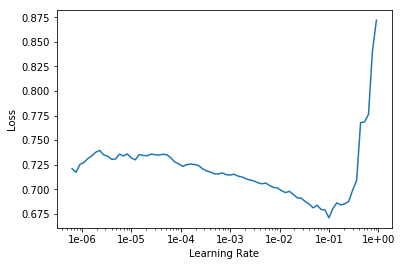

In [9]:
learn2.lr_find()
learn2.recorder.plot()

In [17]:
# learn2.fit_one_cycle(1, 1e-3)

Total time: 00:12
epoch  train_loss  valid_loss  accuracy  F1_macro  F1_micro
1      0.652801    0.648891    0.672384  0.589474  0.672384  (00:12)



In [10]:
factor = 3
lr = 5e-3
lrs = [lr / (factor ** (4 - x)) for x in range(4)] + [lr]
# lrs = [lr for x in range(4)] + [lr]

print(lrs)
wd = 1e-7
dropout_mult = 0.6
encoder = 'encoder_2018_11_21_18_59_44_251649'

learn = text_classifier_learner(data_clas, drop_mult=dropout_mult)
learn.load_encoder(encoder)

learn.metrics += [news_utils.fastai.F1Macro(), news_utils.fastai.F1Weighted()]
# learn.callbacks += [
#     SaveModelCallback(learn, name=exp_id),
# ]

for i in range(1, 4):
    epochs = 1
    if i in [1, 2]:
        learn.freeze_to(-i)
    else:
        learn.unfreeze()
        learn.callbacks += [EarlyStoppingCallback(learn, patience=5)]
        epochs = 10
    learn.fit_one_cycle(epochs, np.array(lrs) * 1 / (i ** 4), wd=wd)

Total time: 04:23
epoch  train_loss  valid_loss  accuracy  F1_macro  F1_weighted
1      0.601696    0.598422    0.703259  0.614290  0.726455     (00:24)
2      0.613831    0.578687    0.715266  0.602012  0.753139     (00:25)
3      0.607437    0.592261    0.716981  0.609365  0.751798     (00:28)
4      0.582381    0.595279    0.723842  0.620714  0.756748     (00:26)
5      0.590236    0.598545    0.686106  0.624590  0.693666     (00:24)
6      0.606532    0.580769    0.720412  0.610200  0.757030     (00:23)
7      0.607472    0.575149    0.720412  0.610200  0.757030     (00:30)
8      0.602718    0.583296    0.698113  0.569106  0.743407     (00:24)
9      0.593567    0.583134    0.713551  0.630807  0.734237     (00:27)
10     0.595533    0.576665    0.706690  0.610253  0.734290     (00:26)

